In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Part 1


In [16]:
df = pd.read_csv("mhc1-peptides.csv")
df.head

<bound method NDFrame.head of          Peptide Immunogenicity
0     AAAAAAAALY       Negative
1      AAAAAIFVI       Positive
2     AAADSAVRLW       Negative
3      AAAGAAVTV       Positive
4      AAAGVVHAV       Negative
...          ...            ...
7570  YYRYPTGESY       Negative
7571   YYSNKAYQY       Negative
7572   YYTHPFQGY       Negative
7573  YYVECEPRCL       Positive
7574   YYYAGSSRL       Positive

[7575 rows x 2 columns]>

In [18]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L','M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def one_hot_encode(seq):
    # not used list
    o = list(set(codes) - set(seq))
    # put sequence into dataframe
    s = pd.DataFrame(list(seq))
    # initialize matrix
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)    
    # split each string int he Series by the seperator ',' and return df with dummy variables
    a = s[0].str.get_dummies(sep=',')
    # tack the rest of the matrix on to a
    a = a.join(x)
    # sort the indices
    a = a.sort_index(axis=1)
    # break out of dataframe - pull out values only
    a = a.values
    # stack them end to end
    e = a.flatten()
    return a,e

In [67]:

ss = df['Peptide'][0]
a,e = one_hot_encode(ss)


In [106]:
encoded = []
label = []
for index, row in df[:].iterrows():
    #print(row['Peptide'])
    a,e = one_hot_encode(row['Peptide'])
    
    e_len = len(e)
    e_len_dif = 260-e_len
    e = np.pad(e,(0,e_len_dif),'constant', constant_values=(0,0))
    
    encoded.append(list(e))
    #print(len(e))
    
    if row["Immunogenicity"] == "Negative":
        label.append(-1)
    else:
        label.append(1)
    

encoded = np.array(encoded)
encoded.shape

(7575, 260)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded, label, test_size=0.33, random_state=42)

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                             random_state=0)
#clf.fit(X_train, y_train)  

In [109]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [110]:
clf.score(X_test, y_test)


0.8016

# Part 2
Processing volcano plots from processes perseus data

In [3]:
# load the data which is "plain matrix export..." of the final HeLa N-Gly only matrix
df = pd.read_csv('testPerseus.txt', sep='\t')
df.keys()

Index(['0 YnMyr_HeLa_1', '1 YnMyr_HeLa_1', '2 YnMyr_HeLa_1', '3 YnMyr_HeLa_1',
       '4 YnMyr_HeLa_1', '5 YnMyr_HeLa_1', '6 YnMyr_HeLa_1', '7 YnMyr_HeLa_1',
       '0 YnMyr_HeLa_2', '1 YnMyr_HeLa_2', '2 YnMyr_HeLa_2', '3 YnMyr_HeLa_2',
       '4 YnMyr_HeLa_2', '5 YnMyr_HeLa_2', '6 YnMyr_HeLa_2', '7 YnMyr_HeLa_2',
       '0 YnMyr_HeLa_3', '1 YnMyr_HeLa_3', '2 YnMyr_HeLa_3', '3 YnMyr_HeLa_3',
       '4 YnMyr_HeLa_3', '5 YnMyr_HeLa_3', '6 YnMyr_HeLa_3', '7 YnMyr_HeLa_3',
       'C: Only identified by site', 'C: Reverse', 'C: Potential contaminant',
       'C: GOBP name', 'C: GOMF name', 'C: GOCC name', 'C: KEGG name',
       'C: Gly N terminus_', 'C: Post-Myr_', 'C: Fatty acid metabolism_',
       'C: Co-myristoylated_', 'N: Peptides', 'N: Razor + unique peptides',
       'N: Unique peptides', 'N: Sequence coverage [%]',
       'N: Unique + razor sequence coverage [%]',
       'N: Unique sequence coverage [%]', 'N: Mol. weight [kDa]', 'N: Q-value',
       'N: Score', 'N: Intensity', 'N: 

In [10]:
# function for collecting the data
# choose the list of channels you want to compare
chan_list = [0,1,2,3,4,5,6,7]

def getData(ind, chan_list, df):
    HeLa_data = []
    for chan in chan_list:
        HeLa_list = [df[f'{chan} YnMyr_HeLa_{rep}'][ind] for rep in [1,2,3]]
        HeLa_data.append(HeLa_list)

    return np.array(HeLa_data)

# for example, say we want to grab channels (columns) and the replicates (rows) of the first indexed gene
getData(0,chan_list,df)


array([[ 4.13561e-02,  4.26241e-01, -1.92921e-01],
       [ 6.70033e-02,  2.69647e-02, -1.19282e-01],
       [-3.26026e-01, -4.50407e-01, -9.18553e-02],
       [-1.90487e-01, -1.75953e-04,  1.87001e-01],
       [-4.61717e-02, -5.79543e-02, -1.38435e-01],
       [-4.13561e-02,  1.75953e-04,  3.60432e-01],
       [ 8.28676e-02, -1.28462e-01,  9.18553e-02],
       [ 1.66336e-01,  6.93967e-01,  2.76670e-01]])

In [20]:
# lets put all the data into a single tensor
allData=[]
for ind in df.index:
    allData.append(getData(ind,chan_list,df))
allData = np.array(allData)
allData.shape

(284, 8, 3)

In [43]:
# volcano plot for channel relative to control channel
def volcano(data, chan, control_chan):
    fold_change = []
    pval = []
    fold = np.mean(data[chan,:])/np.mean(data[control_chan,:])
    _,p = ttest_ind(data[chan,:], data[control_chan,:])
    
    return fold, p
    
volcano(allData[0],0,1)

(-10.850758473571934, 0.6250334256676506)

C:\Users\nebarlow\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log2
  import sys


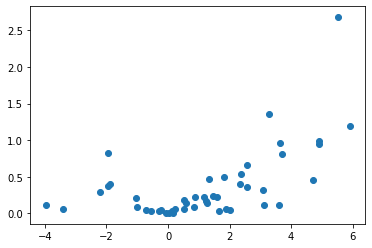

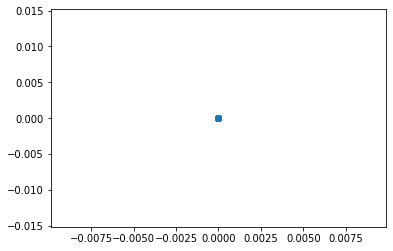

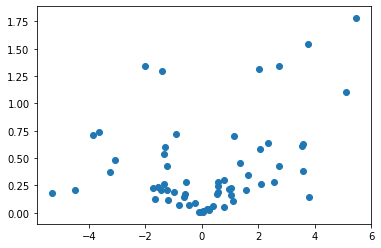

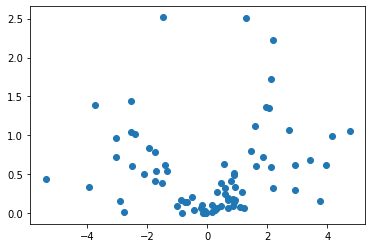

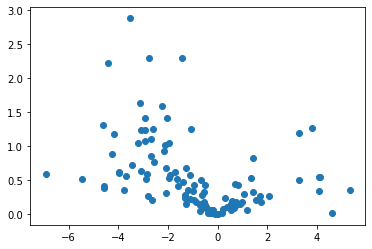

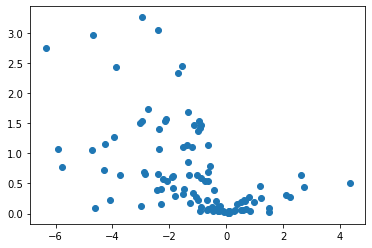

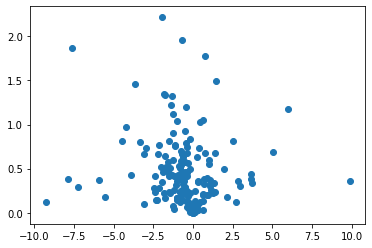

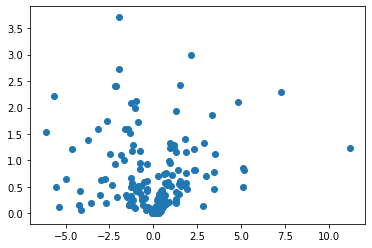

In [61]:
for chan in chan_list:
    volc_data = []
    for data in allData:
        volc_data.append(volcano(data, chan,1))
    volc_data = np.array(volc_data)

    plt.scatter(np.log2(volc_data[:,0]), -np.log10(volc_data[:,1]))
    #plt.axis([-3,3,0,1])
    plt.show()